In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torchvision import datasets, transforms
#from complexPyTorch.complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear
#from complexPyTorch.complexLayers import ComplexDropout2d, NaiveComplexBatchNorm2d
#from complexPyTorch.complexLayers import ComplexBatchNorm1d
#from complexPyTorch.complexFunctions import complex_relu, complex_max_pool2d

#non complex model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, peak_widths

import cvnn.layers as complex_layers

import joblib 

In [3]:
data = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_absorbance.csv')
data_np= np.array(data)
data_500 = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_500.csv')

In [4]:
data_500_np = np.array(data_500)

In [5]:
len(data_500)

25000

In [6]:
data_abs=[]
data_s11=[]
data_param=[]
flag=0
#reshaping the data for better usebility
for j in range(0,25000,50):
    row=[]
    row2=[]
    value3= data_500_np[flag,0:3]
    data_param.append(value3)
    for i in range(0,50,1):
        value = data_500_np[flag,5]
        value2= data_500_np[flag,4]
        row.append(value)
        row2.append(value2)
        flag=flag+1
    data_abs.append(row)
    data_s11.append(row2)
   

In [7]:
data_s11=np.array(data_s11,dtype='complex64')
data_abs=np.array(data_abs,dtype='float64')
data_param=np.array(data_param,dtype='float32')

In [8]:
x_freq = np.linspace(0,5,50)

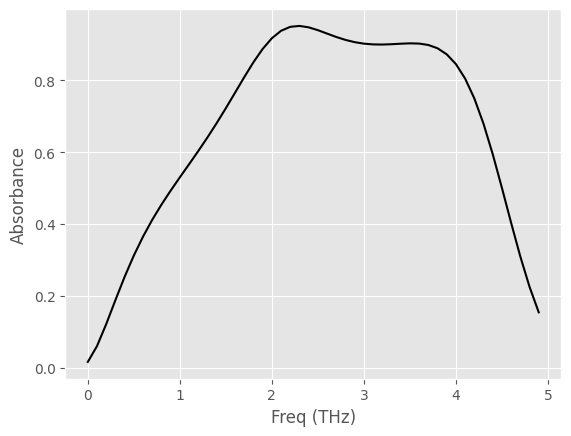

In [9]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66,:],label='complex', color='black')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("Freq (THz)")
    plt.ylabel("Absorbance")
    plt.show()
   # plt.legend()

In [10]:
data_pk=[]
data_am=[]
data_qf=[]
pos=[]
d_m=[]
d_m2=[]

In [11]:
#getting peaks and saving discarded points
for i in range(len(data_abs)):
    peaks, _ = find_peaks(data_abs[i,:],height=0.6)
    if len(peaks)==1:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
    elif len(peaks)==2:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
        d_m2.append(i)
    else:
        d_m.append(i)
        

In [12]:
discard_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(d_m)):
    j = d_m[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    discard_data = pd.concat([discard_data, pd.DataFrame(k)], ignore_index=True)

In [13]:
x_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j = pos[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    x_data = pd.concat([x_data, pd.DataFrame(k)], ignore_index=True)


In [14]:
y_data = pd.DataFrame()
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    m = pd.DataFrame({"Peak":data_pk[i][0],"Amp":data_am[i][0],"Q-Factor":(data_pk[i][0]/data_qf[i][0])},index=[i])
    y_data = pd.concat([y_data, pd.DataFrame(m)], ignore_index=True)

In [15]:
y_data_abs = []
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j=pos[i]
    y_data_abs.append(data_abs[i,:])

In [16]:
discard_data=np.array(discard_data)

In [17]:
y_data=np.array(y_data)
x_data=np.array(x_data)
y_data_abs = np.array(y_data_abs)

In [18]:
x_data.shape

(341, 3)

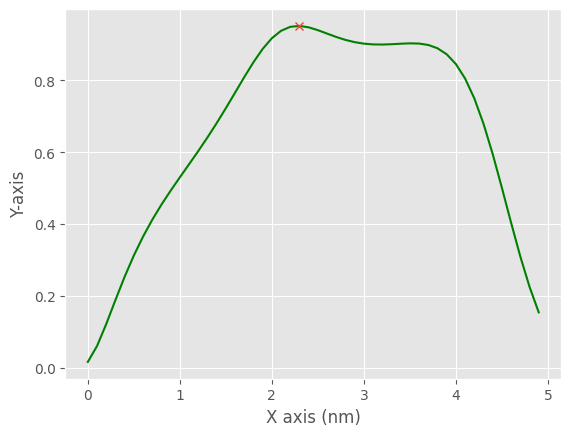

[23 35]


In [19]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
peaks, _ = find_peaks(data_abs[66,:],height=0.6)
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66].T, color='green')
    plt.plot((peaks[0]/50)*5, 0.95, "x")
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()


print(peaks)
   # plt.legend()

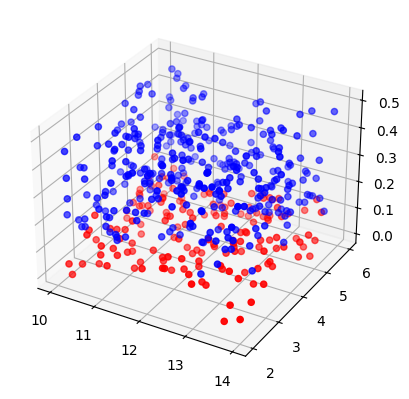

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data[:,1],x_data[:,0],x_data[:,2],color='blue')
ax.scatter(discard_data[:,1],discard_data[:,0],discard_data[:,2], color ='red')
plt.show()

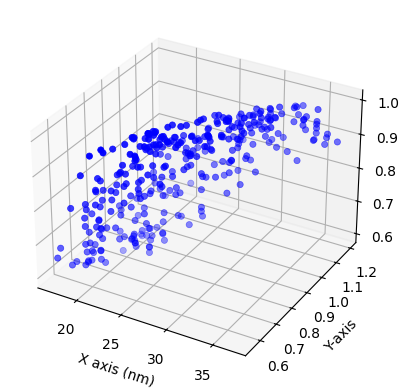

In [21]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_data[:,0],y_data[:,2],y_data[:,1],color='blue')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [22]:
#Splitting data for both models 

scaler = StandardScaler()
X = scaler.fit_transform(x_data)
Y= y_data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [319]:

# Assuming X and Y are your feature and target matrices respectively
# Split the data into training and testing sets
X_train_m1 = X_train
X_test_m1 = X_test
X_val_m1 = X_val
y_val_m1 = y_val
y_train_m1= y_train
y_test_m1=y_test

# Create a Sequential model
model_1 = Sequential()

# Add the input layer and the first hidden layer
model_1.add(Dense(100, input_shape=(3,), activation='relu'))  # Assuming 64 neurons in the first hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(20, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(1280, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(640, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(360, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(128, activation='relu'))  # Example of adding another hidden layer

# Add the output layer
model_1.add(Dense(3, activation='linear'))  # Assuming 5 design parameters, using linear activation

# Compile the model
model_1.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function

# Print a summary of the model
model_1.summary()

#Early stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# Train the model
history = model_1.fit(X_train_m1, y_train_m1, epochs=5000, verbose=1, callbacks=[es], batch_size=32,validation_data=(X_val_m1, y_val_m1))

# Make predictions
predictions = model_1.predict(X_test_m1)  # Replace X_test with your actual test data


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               400       
                                                                 
 dense_73 (Dense)            (None, 3)                 303       
                                                                 
Total params: 703 (2.75 KB)
Trainable params: 703 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5000
9/9 [==============================] - 1s 25ms/step - loss: 219.2971 - val_loss: 250.8849
Epoch 2/5000
9/9 [==============================] - 0s 10ms/step - loss: 215.4186 - val_loss: 246.6382
Epoch 3/5000
9/9 [==============================] - 0s 11ms/step - loss: 211.6111 - val_loss: 242.4729
Epoch 4/5000
9/9 [==============================] - 0s 10ms/step - loss: 207.7536 - val_loss: 238.2763
Epoch 5

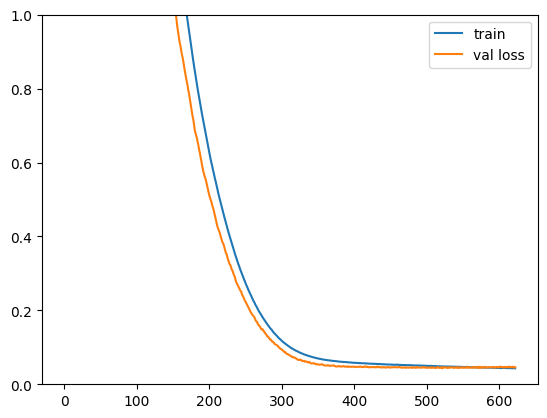

In [320]:


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [321]:


# save model with joblib 
filename = '1L_100N_RELU_3feature_ES.sav'
joblib.dump(model_1, filename)

['1L_100N_RELU_3feature_ES.sav']

In [64]:
# %% [markdown]
# 
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# %%

# %%
# Load CSV files


def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)
    
def resume(model, filename):
    model.load_state_dict(torch.load(filename))
    
# Extract input and output data
# Convert to PyTorch tensors

#print(f"input data:{X}, output data: {y}")
X_train_m2 =  torch.tensor(X_train, dtype=torch.float32)
X_test_m2 =  torch.tensor(X_test, dtype=torch.float32)
X_val_m2 = torch.tensor(X_val, dtype=torch.float32)
y_val_m2 = torch.tensor(y_val, dtype=torch.float32)
y_train_m2= torch.tensor(y_train, dtype=torch.float32)
y_test_m2= torch.tensor(y_test, dtype=torch.float32)


# Define the neural network
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MyNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.GELU()
        ])
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.GELU()
            ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Define the input, hidden, and output sizes
input_size = X.shape[1]
hidden_sizes = [50,50]  # Adjust the number of neurons and layers as needed
output_size = Y.shape[1]

# Create an instance of the neural network
model = MyNeuralNetwork(input_size, hidden_sizes, output_size)
print(model)
# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adaptive Moment Estimation

    
# Training loop
num_epochs = 50000

early_stop_thresh = 100
best_loss = 1000
best_epoch = 1
 
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_m2)
    loss = criterion(outputs, y_train_m2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    
# Make predictions on new data
    with torch.no_grad():
        new_data = X_val_m2.clone().detach().requires_grad_(True)
        val_predictions  = model(new_data)

# Evaluate the model on the test set
    val_loss = criterion(val_predictions, y_val_m2)
    print(f'Validation MSE: {val_loss.item():.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        best_epoch = epoch
        checkpoint(model,"best_model.pth")
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
    elif epoch-best_epoch > early_stop_thresh:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop

resume(model, "best_model.pth")


# %%
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        test_predict  = model(new_data)
# Convert predictions to numpy array if needed
predictions_m2 = test_predict.numpy()


# Evaluate the model on the test set
test_loss = criterion(test_predict, y_test_m2)
print(f'Test MSE: {test_loss.item():.4f}')
# %%






MyNeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): GELU(approximate='none')
  )
  (output_layer): Linear(in_features=50, out_features=3, bias=True)
)
Validation MSE: 251.1370
Epoch [1/50000], Training MSE: 218.4565
Validation MSE: 250.7583
Epoch [2/50000], Training MSE: 218.1047
Validation MSE: 250.3785
Epoch [3/50000], Training MSE: 217.7525
Validation MSE: 249.9974
Epoch [4/50000], Training MSE: 217.3995
Validation MSE: 249.6139
Epoch [5/50000], Training MSE: 217.0451
Validation MSE: 249.2272
Epoch [6/50000], Training MSE: 216.6886
Validation MSE: 248.8364
Epoch [7/50000], Training MSE: 216.3292
Validation MSE: 248.4405
Epoch [8/50000], Training MSE: 215.9658
Validation MSE: 248.0386
Epoch [9/50000], Training MSE: 215.5977
Validation MSE: 247.6299
Epoch [10/50000], Training MSE: 215.2239
Validation MSE: 247.2135
Epoch [11/50000

In [65]:
import pickle
# save model with joblib 
#filename = '1L_100N_GELU_3feature_ES.sav'
#joblib.dump(model, filename)

filename = '2L_50N_GELU_3feature_ES.sav'
pickle.dump(model, open(filename, 'wb'))


In [31]:
X_test_m2= torch.tensor(X_test, dtype=torch.float32)

L_relu = joblib.load('1L_RELU_3feature_ES.sav')
L_gelu = joblib.load('1L_100N_GELU_3feature_ES.sav')
# evaluate model 
L_pred_m1 = L_relu.predict(X_test)

with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        L_pred_m2 = L_gelu(new_data)
L_pred_m2= L_pred_m2.numpy()


AttributeError: Can't get attribute 'MyNeuralNetwork' on <module '__main__'>

In [41]:
#y_test = y_test.numpy()

from numpy import linalg as LA

def nmrs (pred_np,y_tst):
    x=LA.norm(y_tst-pred_np)/LA.norm(y_tst-np.mean(y_tst))
    return x


In [232]:
y_test.shape


(35, 3)

In [458]:
# save model with joblib 
filename = '3L_GELU_3feature_ES.sav'
joblib.dump(model, filename)

['3L_GELU_3feature_ES.sav']

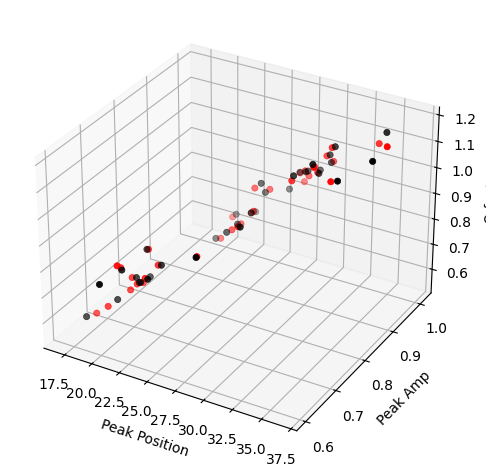

In [58]:
w2=np.arange(0,50,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_test[:,0],y_test[:,1],y_test[:,2],color='black')
    ax.scatter(predictions_m2[:,0],predictions_m2[:,1],predictions_m2[:,2], color='red')
#    ax.scatter(predictions[:,1],predictions[:,0], color='green')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("Peak Position")
    ax.set_ylabel("Peak Amp")
    ax.set_zlabel("Q-factor")
  #  plt.legend()               
    plt.tight_layout()
    plt.show()
   

In [443]:
predictions_m2.shape

(35, 3)

In [212]:
from sklearn.metrics import r2_score
#plot for fullwaveform predictions
w2=np.linspace(0,5,50) #
plt.plot(w2,predictions_m2[10,:],label="pred_gelu", color="red")
plt.plot(w2,predictions[10,:],label="pred_relu", color="green")
plt.plot(w2,y_test[10,:],label="data",color="blue")
#plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[34,:], predictions[34,:])), (5, 0.7))
#plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[34,:], predictions_m2[34,:])), (5, 0.65))
plt.annotate("Global ReLU NMRSE = {:.3f}".format(nmrs(predictions[:,:],y_test[:,:])), (5, 0.7))
plt.annotate("Global GeLU NMRSE = {:.3f}".format(nmrs(predictions_m2[:,:],y_test[:,:])), (5, 0.65))
   # plt.plot(w1,Y[2,:], color='green')
    #plt.plot(w1,Y[3,:], color='blue')
    #plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
plt.title("Sample No - 1")
plt.xlabel("Freq Thz")
plt.ylabel("Absorbance")
plt.legend(loc="upper left")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (3,)

In [110]:
L_gelu = pickle.load(open('2L_30N_GELU_3feature_ES.sav', 'rb'))
#x = pickle.load('1L_100N_GELU_3feature_ES.sav')
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        L_pred_m2 = L_gelu(new_data)
L_pred_m2= L_pred_m2.numpy()

L_gelu_2 = pickle.load(open('2L_20N_GELU_3feature_ES.sav', 'rb'))
#x = pickle.load('1L_100N_GELU_3feature_ES.sav')
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        L_pred_m1 = L_gelu_2(new_data)
L_pred_m1= L_pred_m1.numpy()


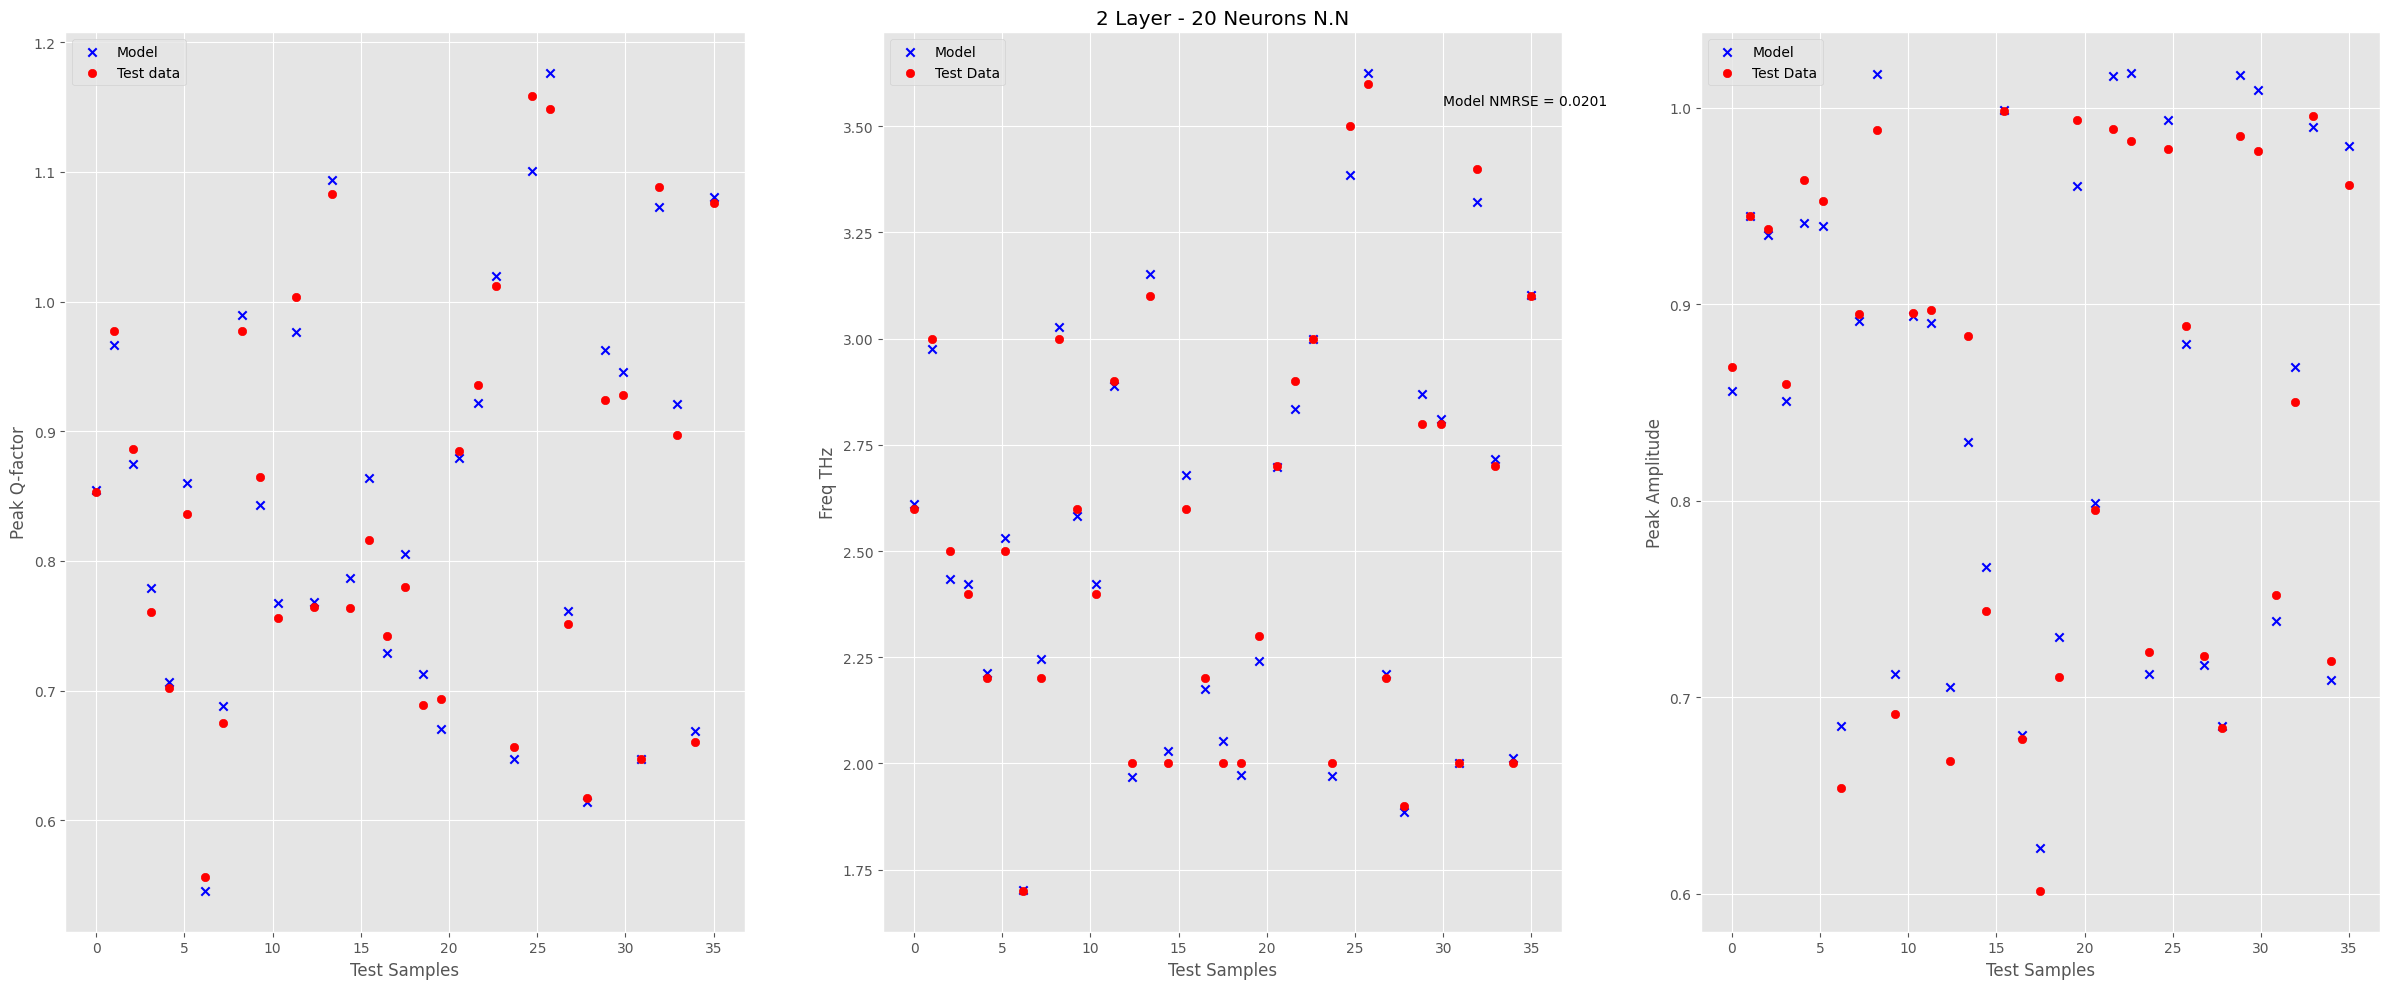

In [113]:
w1=np.linspace(0,35,35)
with plt.style.context('ggplot'):#sanity check if correct waveforms are loaded
    fig, axs = plt.subplots(1, 3, figsize=(24, 10))
#plot for 3 features output
   # axs[0].scatter(w1,predictions_m2[0:35,2]/10,label="Model",marker='x', color="blue") #,predictions_m2[0:20,2]
    axs[0].scatter(w1,L_pred_m1[0:35,2],label="Model", color="blue",marker='x')
  #  axs[0].scatter(predictions[0:10,0],predictions[0:10,1],label="pred_relu", color="green")
    axs[0].scatter(w1,y_test[0:35,2],label="Test data",color="red") #y_test[0:20,2],
    #plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions[0:20,0])), (, 0.95))
    #plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions_np[0:20,0])), (37, 1.00))
 #   axs[0].annotate("ReLU NMRSE = {:.4f}".format(nmrs(predictions[:,:],y_test[:,:])), (2.5, 0.7))
   # axs[0].annotate("Model NMRSE = {:.4f}".format(nmrs(predictions_m2[:,:],y_test[:,:])), (2.5, 0.65))
       # plt.plot(w1,Y[2,:], color='green')
        #plt.plot(w1,Y[3,:], color='blue')
        #plt.plot(w1,Y[4,:], color='red')
        #plt.plot(w3,y_2p_wav[1,:])
    axs[0].set_xlabel("Test Samples")
    axs[0].set_ylabel("Peak Q-factor")
    axs[0].legend(loc="upper left")
    #axs[0].set_title("1 Layer - 100 Neurons N.N")

    #axs[1].scatter(L_pred_m2[0:20,0]/10,L_pred_m2[0:20,2],label="pred_gelu", color="red")
    axs[1].scatter(w1,L_pred_m1[0:35,0]/10,label="Model", marker='x', color="blue")
    axs[1].scatter(w1,y_test[0:35,0]/10,label="Test Data",color="red")
   # y_test[0:20,0],,L_pred_m2[0:20,2]/10
    #plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions[0:20,0])), (, 0.95))
    #plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions_np[0:20,0])), (37, 1.00))
  #  axs[1].annotate("ReLU NMRSE = {:.3f}".format(nmrs(L_pred_m1[:,:],y_test[:,:])), (3, 0.7))
    axs[1].annotate("Model NMRSE = {:.4f}".format(nmrs(L_pred_m1[:,:],y_test[:,:])), (30, 3.55))
       # plt.plot(w1,Y[2,:], color='green')
        #plt.plot(w1,Y[3,:], color='blue')
        #plt.plot(w1,Y[4,:], color='red')
        #plt.plot(w3,y_2p_wav[1,:])
    axs[1].set_xlabel("Test Samples")
    axs[1].set_ylabel("Freq THz")
    axs[1].legend(loc="upper left")
    axs[1].set_title("2 Layer - 20 Neurons N.N")

  #axs[1].scatter(L_pred_m2[0:20,0]/10,L_pred_m2[0:20,2],label="pred_gelu", color="red")
    axs[2].scatter(w1,L_pred_m1[0:35,1],label="Model", marker='x', color="blue")
    axs[2].scatter(w1,y_test[0:35,1],label="Test Data",color="red")
    axs[2].set_xlabel("Test Samples")
    axs[2].set_ylabel("Peak Amplitude")
    axs[2].legend(loc="upper left")
  #  axs[2].set_ylim(0.5, 1)
  #  axs[2].set_title("1 Layer - 100 Neurons N.N")
plt.tight_layout()
plt.savefig('2 Layer - 20 Neurons', bbox_inches='tight')
plt.show()



In [124]:
y_test[10

torch.Size([69, 50])

In [181]:
loaded_3L = joblib.load('3L_RELU_50wav.sav')
loaded_5L = joblib.load('5L_RELU_50wav.sav')
# evaluate model 
Relu_3L = loaded_3L.predict(X_test)
Relu_5L = loaded_5L.predict(X_test)

# check results

3/3 [==============================] - 0s 4ms/step


In [319]:

w1=np.arange(0,5,0.1) #plaotting original data for verification

with plt.style.context('ggplot'):#sanity check if correct waveforms are loaded
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
   # plt.subplot(1, 2, 1) 
    
    #plt.plot(w3,y_2p_wav[1,:])
   # plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    
    axs[0].plot(w1,y_test[1,:].T, color='green', label='Test Data')
    axs[0].plot(w1,Relu_3L[1,:].T,label='predicted', color='blue')
    axs[0].set_title("ReLU-3L")
    axs[0].set_ylabel("Absorbance")
    axs[0].set_xlabel("Freq THz")
    axs[0].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], Relu_3L[1,:])), (0, 0.6))
    axs[0].legend()
    
    #axs[1].subplot(1,2,2,figsize=(12, 5))
 #   axs[1].plot(w4,predictions[1,:],label='complex', color='black')
  #  axs[1].plot(w4,y_test[1,:], label='absorbance')

    axs[1].plot(w1,y_test[1,:].T, color='green', label='Test Data')
    axs[1].plot(w1,Relu_5L[1,:].T,label='predicted', color='blue')
    axs[1].set_title("GeLU-5L")
    axs[1].set_ylabel("Absorbance")
    axs[1].set_xlabel("Freq THz")
    axs[1].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], Relu_5L[1,:])), (0, 0.8))
    axs[1].legend()
                     
    plt.tight_layout()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and torch.Size([3])

In [198]:
flag=0
flag_2=0
pos=[]
pos_2=[]
diff=[]
for i in range(len(predictions_np)):
    er_1 = r2_score(y_test[i,:].real, Relu_5L[i,:].real)
    er_2 = r2_score(y_test[i,:].real, predictions_np[i,:].real)
    if(er_1<er_2):
        flag=er_2
        pos.append(i)
        value= er_1-er_2
        diff.append(er_2-er_1)
    elif(er_1>er_2):
        flag_2=er_1
        pos_2.append(i)
        diff.append(er_2-er_1)
        

In [204]:
m=max(diff)
print(diff.index(m))

57
